In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
df_mc = pd.read_csv('Mcdonalds data 2021-24.csv')

# Visualización Data Set

In [2]:
# Vemos un resumen de los datos
df_mc.head()

,table,heading,subheading,2024,2023,2022,2021,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,revenue_breakdown,company_operated,company_operated_us,3197.0,3221.0,"2,836","2,617",NaN,NaN,NaN,NaN,NaN
1,revenue_breakdown,company_operated,company_operated_international_operated_markets,5713.0,5702.0,"5,179","6,456",NaN,NaN,NaN,NaN,NaN
2,revenue_breakdown,company_operated,company_operated_intl_dev_licensed_and_corp,872.0,819.0,733,715,NaN,NaN,NaN,NaN,NaN
3,revenue_breakdown,franchised,franchised_us,7211.0,7163.0,"6,585","6,094",NaN,NaN,NaN,NaN,NaN
4,revenue_breakdown,franchised,franchised_international_operated_markets,6746.0,6549.0,"5,985","5,638",NaN,NaN,NaN,NaN,NaN


Vemos que los datos tienen comas y puntos como separador decimal aparte del simbolo de dólar en algunos datos. Además, hay datos faltantes en algunas filas.
Por otro lado, el data set se compone de 7 columnas. Tres de ellas hacen referencia a los estados contables, y las otras cuatro, hacen referencia a los años del 2021 al 2024 con las cifras de dichos estados contables. Finalmente, las últimas columnas están compuestas por valores faltantes.

# Comprobación y limpieza de datos nulos

In [3]:
# Comprobamos los valores nulos que tenemos
df_mc.isnull().sum()

table           8
heading         8
subheading      8
2024            8
2023            8
2022            8
2021            8
Unnamed: 7     93
Unnamed: 8     93
Unnamed: 9     93
Unnamed: 10    93
Unnamed: 11    93
dtype: int64

In [4]:
# Limpiamos los datos para que puedan ser float
columnas = ['2021','2022','2023','2024']

for columnas_limpias in columnas:
    df_mc[columnas_limpias] = df_mc[columnas_limpias].astype(str).str.replace(',', '.')  
    df_mc[columnas_limpias] = df_mc[columnas_limpias].astype(str).str.replace('$', '')

# Para que funcione, tenemos que guardar los cambios en columnas_limpias, si no, no hace nada

In [5]:
df_mc.head(10)

,table,heading,subheading,2024,2023,2022,2021,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,revenue_breakdown,company_operated,company_operated_us,3197.0,3221.0,2.836,2.617,NaN,NaN,NaN,NaN,NaN
1,revenue_breakdown,company_operated,company_operated_international_operated_markets,5713.0,5702.0,5.179,6.456,NaN,NaN,NaN,NaN,NaN
2,revenue_breakdown,company_operated,company_operated_intl_dev_licensed_and_corp,872.0,819.0,733,715,NaN,NaN,NaN,NaN,NaN
3,revenue_breakdown,franchised,franchised_us,7211.0,7163.0,6.585,6.094,NaN,NaN,NaN,NaN,NaN
4,revenue_breakdown,franchised,franchised_international_operated_markets,6746.0,6549.0,5.985,5.638,NaN,NaN,NaN,NaN,NaN
5,revenue_breakdown,franchised,franchised_intl_dev_licensed_and_corp,1758.0,1724.0,1.536,1.353,NaN,NaN,NaN,NaN,NaN
6,revenue_breakdown,other,other_revenues,423.0,316.0,329,351,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN
9,operating_non_operating_table,operating_costs_company_owned,food_and_paper,2995.0,3039.0,2.737.30,3.096.80,NaN,NaN,NaN,NaN,NaN


In [6]:
# Ahora forzamos a que las columnas sean numéricas poniendo como Nan los valores que no se puedan convertir
for año in columnas:
    df_mc[año] = pd.to_numeric(df_mc[año], errors='coerce')

In [7]:
# Ahora convertimos las columnas a float
for columnas_float in columnas:
    df_mc[columnas] = df_mc[columnas].astype(float)

In [8]:
# Vemos cómo hemos podido cambiar los tipos a float
df_mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   table        85 non-null     object 
 1   heading      85 non-null     object 
 2   subheading   85 non-null     object 
 3   2024         85 non-null     float64
 4   2023         85 non-null     float64
 5   2022         58 non-null     float64
 6   2021         75 non-null     float64
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
dtypes: float64(9), object(3)
memory usage: 8.8+ KB


Este código elimina del DataFrame df_mc todas las columnas cuyos nombres comienzan por "Unnamed" (como "Unnamed: 0", "Unnamed: 1", etc.), que suelen aparecer al leer archivos CSV con índices duplicados o mal formateados. Utiliza df_mc.loc[:, ...] para seleccionar todas las filas (:) y solo las columnas que  no (~) cumplen con el patrón de nombre que empieza por "Unnamed" (df_mc.columns.str.contains('^Unnamed')), manteniendo así solo las columnas útiles en el DataFrame.

In [9]:
# Finalmente, eliminamos las columnas que no nos interesan
df_mc = df_mc.loc[:, ~df_mc.columns.str.contains('^Unnamed')] 

In [10]:
# Vemos cómo se ha limpiado el DataFrame, eliminando las últimas filas
df_mc.head(50)

,table,heading,subheading,2024,2023,2022,2021
0,revenue_breakdown,company_operated,company_operated_us,3197.00,3221.0,2.836,2.617
1,revenue_breakdown,company_operated,company_operated_international_operated_markets,5713.00,5702.0,5.179,6.456
2,revenue_breakdown,company_operated,company_operated_intl_dev_licensed_and_corp,872.00,819.0,733.000,715.000
3,revenue_breakdown,franchised,franchised_us,7211.00,7163.0,6.585,6.094
4,revenue_breakdown,franchised,franchised_international_operated_markets,6746.00,6549.0,5.985,5.638
5,revenue_breakdown,franchised,franchised_intl_dev_licensed_and_corp,1758.00,1724.0,1.536,1.353
6,revenue_breakdown,other,other_revenues,423.00,316.0,329.000,351.000
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,operating_non_operating_table,operating_costs_company_owned,food_and_paper,2995.00,3039.0,NaN,NaN


# Tratamiento de Datos Faltantes

In [11]:
df_mc.isnull().sum()

table          8
heading        8
subheading     8
2024           8
2023           8
2022          35
2021          18
dtype: int64

In [12]:
# Ahora imputamos los valores nulos con la mediana, ya que es más robusta
for impu in columnas:
    mediana = df_mc[impu].median()
    if not pd.isna(mediana):
        df_mc[impu] = df_mc[impu].fillna(mediana)
    

In [13]:
# Vemos cómo ya no hay valores nulos en las columnas de años
df_mc.isnull().sum()

table         8
heading       8
subheading    8
2024          0
2023          0
2022          0
2021          0
dtype: int64

In [14]:
df_mc.head(10)

,table,heading,subheading,2024,2023,2022,2021
0,revenue_breakdown,company_operated,company_operated_us,3197.0,3221.0,2.836,2.617
1,revenue_breakdown,company_operated,company_operated_international_operated_markets,5713.0,5702.0,5.179,6.456
2,revenue_breakdown,company_operated,company_operated_intl_dev_licensed_and_corp,872.0,819.0,733.000,715.000
3,revenue_breakdown,franchised,franchised_us,7211.0,7163.0,6.585,6.094
4,revenue_breakdown,franchised,franchised_international_operated_markets,6746.0,6549.0,5.985,5.638
5,revenue_breakdown,franchised,franchised_intl_dev_licensed_and_corp,1758.0,1724.0,1.536,1.353
6,revenue_breakdown,other,other_revenues,423.0,316.0,329.000,351.000
7,NaN,NaN,NaN,636.0,732.0,45.500,260.400
8,NaN,NaN,NaN,636.0,732.0,45.500,260.400
9,operating_non_operating_table,operating_costs_company_owned,food_and_paper,2995.0,3039.0,45.500,260.400


In [15]:
# Vemos que en las colunas table y heading hay Nan, por lo que vamos a eliminar las filas que tengan nan, ya que son pocos y no tenemos forma de imputarlos
df_mc = df_mc.dropna(subset=['table', 'heading'])

# El subset le dice que solo tiene que mirar en esas columnas

In [16]:
# Vemos cómo ya no hay valores nulos en todo el DataFrame
df_mc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 0 to 92
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   table       85 non-null     object 
 1   heading     85 non-null     object 
 2   subheading  85 non-null     object 
 3   2024        85 non-null     float64
 4   2023        85 non-null     float64
 5   2022        85 non-null     float64
 6   2021        85 non-null     float64
dtypes: float64(4), object(3)
memory usage: 5.3+ KB


In [17]:
# Vemos cómo la columna 7 y 8 se han eliminado ya que tenían Nan
df_mc.head(10)

,table,heading,subheading,2024,2023,2022,2021
0,revenue_breakdown,company_operated,company_operated_us,3197.0,3221.0,2.836,2.617
1,revenue_breakdown,company_operated,company_operated_international_operated_markets,5713.0,5702.0,5.179,6.456
2,revenue_breakdown,company_operated,company_operated_intl_dev_licensed_and_corp,872.0,819.0,733.000,715.000
3,revenue_breakdown,franchised,franchised_us,7211.0,7163.0,6.585,6.094
4,revenue_breakdown,franchised,franchised_international_operated_markets,6746.0,6549.0,5.985,5.638
5,revenue_breakdown,franchised,franchised_intl_dev_licensed_and_corp,1758.0,1724.0,1.536,1.353
6,revenue_breakdown,other,other_revenues,423.0,316.0,329.000,351.000
9,operating_non_operating_table,operating_costs_company_owned,food_and_paper,2995.0,3039.0,45.500,260.400
10,operating_non_operating_table,operating_costs_company_owned,payroll_and_employee_benefits,2959.0,2886.0,45.500,260.400
11,operating_non_operating_table,operating_costs_company_owned,occupancy_and_other_operating_expenses,2381.0,2299.0,45.500,260.400


# Tratamiento Outliers

In [18]:
# Vemos cuáles son los máximos de las columnas del DataFrame
df_mc.max() # Este me dice el dato exacto
#df_mc.idxmax() # Este me dice el índice del dato máximo (hay que tener en cuenta que si eliminamos filas, el índice no coincide con el del csv original)

table                           share
heading                         total
subheading    treasury_stock_at_cost_
2024                          66834.0
2023                          63480.0
2022                           6177.0
2021                          57534.7
dtype: object

In [19]:
# Vemos cuál es el mínimo de cada columna
df_mc.min()

table                                            assets
heading       cash_and_equivalents_at_beginning_of_year
subheading                             Accounts payable
2024                                           -77375.0
2023                                           -74640.0
2022                                            -4168.0
2021                                           -67810.2
dtype: object

# Datos Atípicos

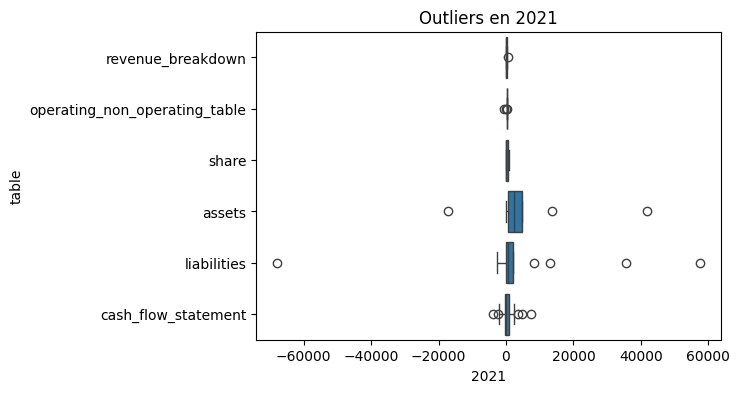

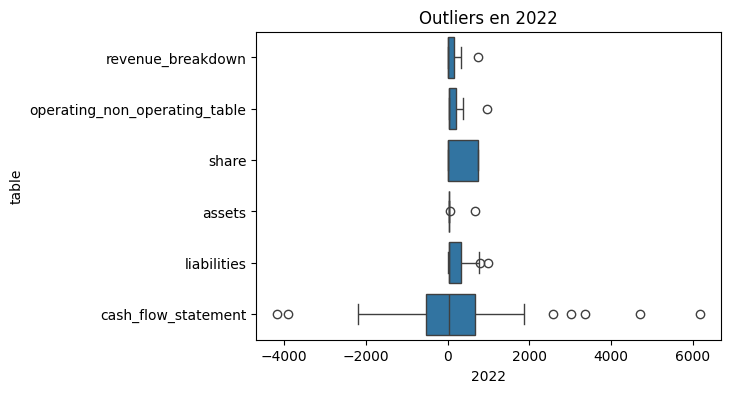

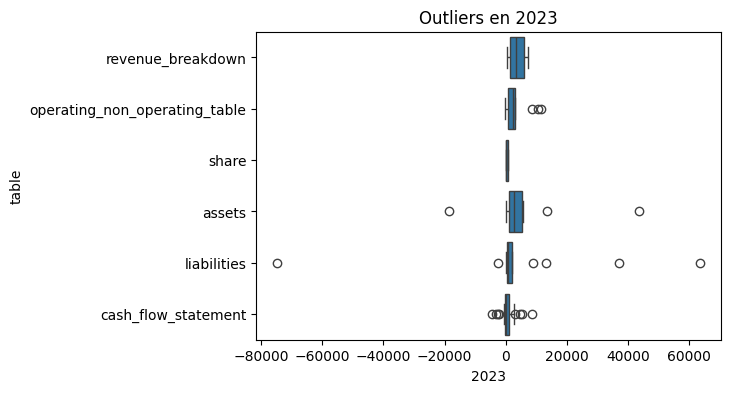

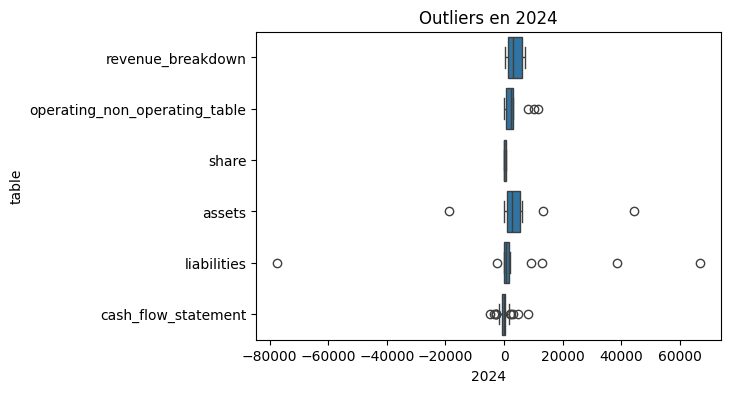

In [20]:
# Ahora vamos a comprobar si hay datos atípicos con un boxplot
for box in columnas: 
    plt.figure(figsize=(6, 4)) 
    sns.boxplot(x=df_mc[box], y=df_mc['table']) 
    plt.title(f'Outliers en {box}') 
    plt.show() 


En este ejemplo, hemos usado el Rango Intercuartílico para eliminar outliers, algo que no es muy recomendable cuando se trata de balances, ya que podríamos estar eliminando información relevante. Sin embargo, a modo de ejemplo y para aprender, nos viene bien. La forma correcta de realizarlo sería yendo a la columna subheading, identificando qué cuenta es y viendo si es correcto o no que sea negativo. Eliminando uno a uno los datos que no nos interesen o no sean correctos. 

In [21]:
# Identificar las filas a limpiar
variables_a_limpiar = df_mc['table'].isin(['assets', 'liabilities', 'cash_flow_statement'])

# Dividir el DataFrame
df_a_limpiar = df_mc[variables_a_limpiar].copy()
df_sin_limpiar = df_mc[~variables_a_limpiar].copy()

# Función para eliminar outliers negativos con IQR
def quitar_outlier_negativos(df, columnas):
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        df = df[~((df[col] < lower_bound) & (df[col] < 0))]
    return df

# Limpiamos solo las tablas seleccionadas
df_limpio = quitar_outlier_negativos(df_a_limpiar, columnas)

# Unimos el limpio + el resto sin tocar
df = pd.concat([df_limpio, df_sin_limpiar], ignore_index=True)


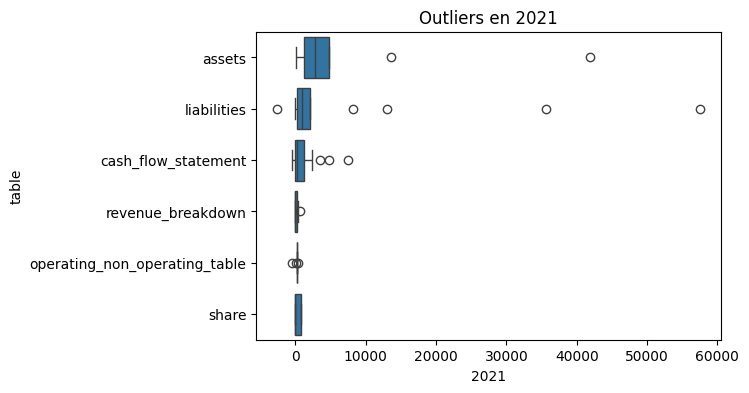

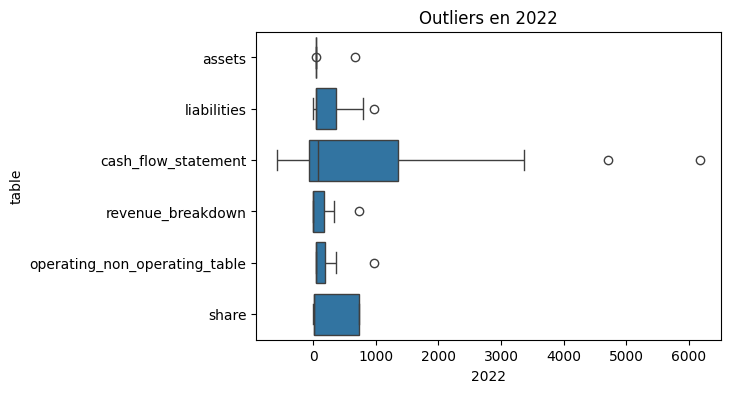

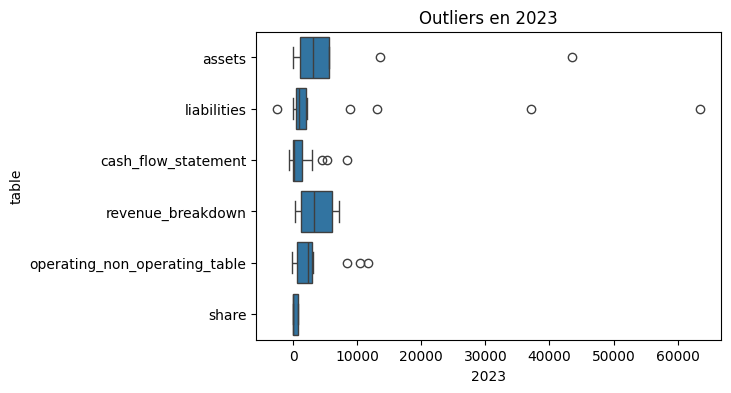

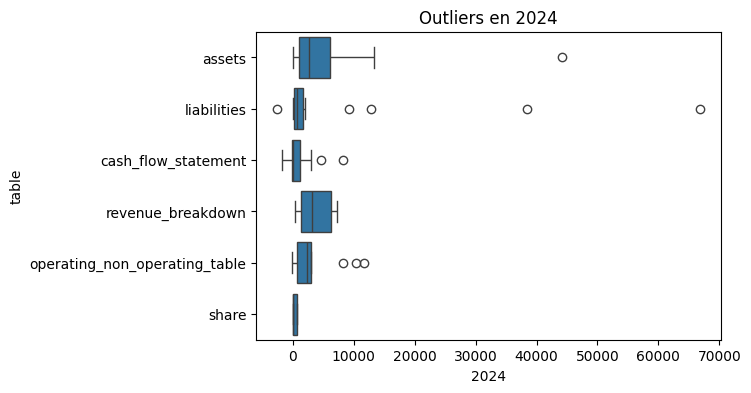

In [22]:
for box in columnas: 
    plt.figure(figsize=(6, 4)) 
    sns.boxplot(x=df[box], y=df['table']) # Duda, porque si pongo df_mc, no salen outliers negativos en assets y liabilities
    plt.title(f'Outliers en {box}') 
    plt.show() 

#### Conclusión Outliers
Vemos que ya no aparecen outliers. Sin embargo, a pesar de que hemos eliminado todos los datos atípicos negativos, no es del todo correcto, ya que hay cuentas de pasivos y activos que pueden ser negativas. Por ello, lo que se debería hacer es un estudio más cuidadoso con el fin de no eliminar datos relevantes para el data set, que les darían mayor fiabilidad.

# Análisis Global

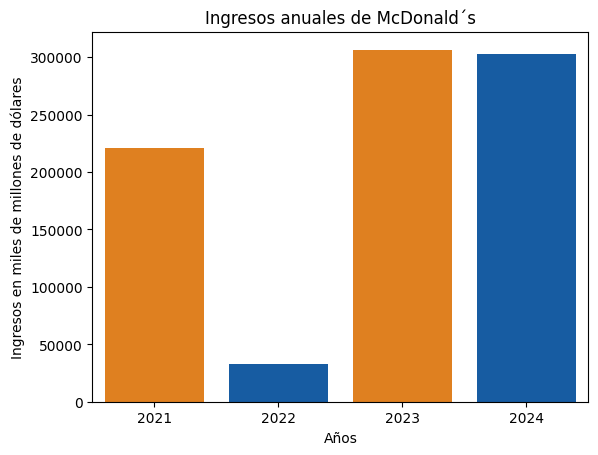

In [23]:
# Ahora vamos a hacer un gráfico de barras para ver los ingresos anuales de McDonald's
df_anual = df[columnas].sum().reset_index()
df_anual.columns = ('columnas','revenue')

sns.barplot(x='columnas', y='revenue', data=df_anual, hue= 'columnas', palette=['#FF8000', '#005CB9', '#FF8000', '#005CB9'])
plt.title('Ingresos anuales de McDonald´s')
plt.ylabel('Ingresos en miles de millones de dólares')
plt.xlabel('Años')
plt.show()

In [24]:
df_anual

,columnas,revenue
0,2021,220518.058
1,2022,32853.601
2,2023,306509.000
3,2024,302570.820


In [25]:
# ¿Cómo varían porcentualmente las ventas?
df_crecimiento = df_anual['revenue']
df_crecimiento = df_crecimiento.pct_change() * 100
df_crecimiento

0           NaN
1    -85.101628
2    832.954047
3     -1.284850
Name: revenue, dtype: float64

#### Conclusiones Análisis Global

- Vemos que el segundo año con respecto al primero las ventas caen un 92,69%, que el año 3 respecto al año 2 aumentan un 1644% y que el año 4 caen un 3,05% respecto al año 3. Todo ello se visualiza en la gráfica.

- Vemos que en el año 2022 hay una caida abrupta, la cual analizaremos en el siguiente apartado.

# Análisis Financiero

Aquí creamos un df agrupado para poder comparar las diferentes categorías en los distintos años viendo de esta forma si aumentan o disminuyen. 

In [26]:
df_agrupado = df.groupby("heading")[columnas].sum().reset_index()
df_agrupado

,heading,2021,2022,2023,2024
0,cash_and_equivalents_at_beginning_of_year,3449.900,4709.000,2584.0,4579.00
1,cash_and_equivalents_at_end_of_year,4709.200,2584.000,4579.0,1085.00
2,changes_in_working_capital,454.200,-645.000,-108.0,-438.00
3,charges_and_credit,1142.100,1855.000,1251.0,1661.00
4,company_operated,724.073,741.015,9742.0,9782.00
5,current_assets,7148.500,816.400,7986.0,4598.00
6,current_liabilities,4020.000,2610.200,6859.0,3861.00
7,effect_of_exchange_rates,-120.100,-254.000,-58.0,-101.00
8,financing_activity,1408.500,3686.000,5654.0,2978.00
9,franchised,13.085,14.106,15436.0,15715.00


A continuación, vamos a ver cómo de relacionadas están las variables de heading entre sí para poder realizar mejor el análisis posterior.

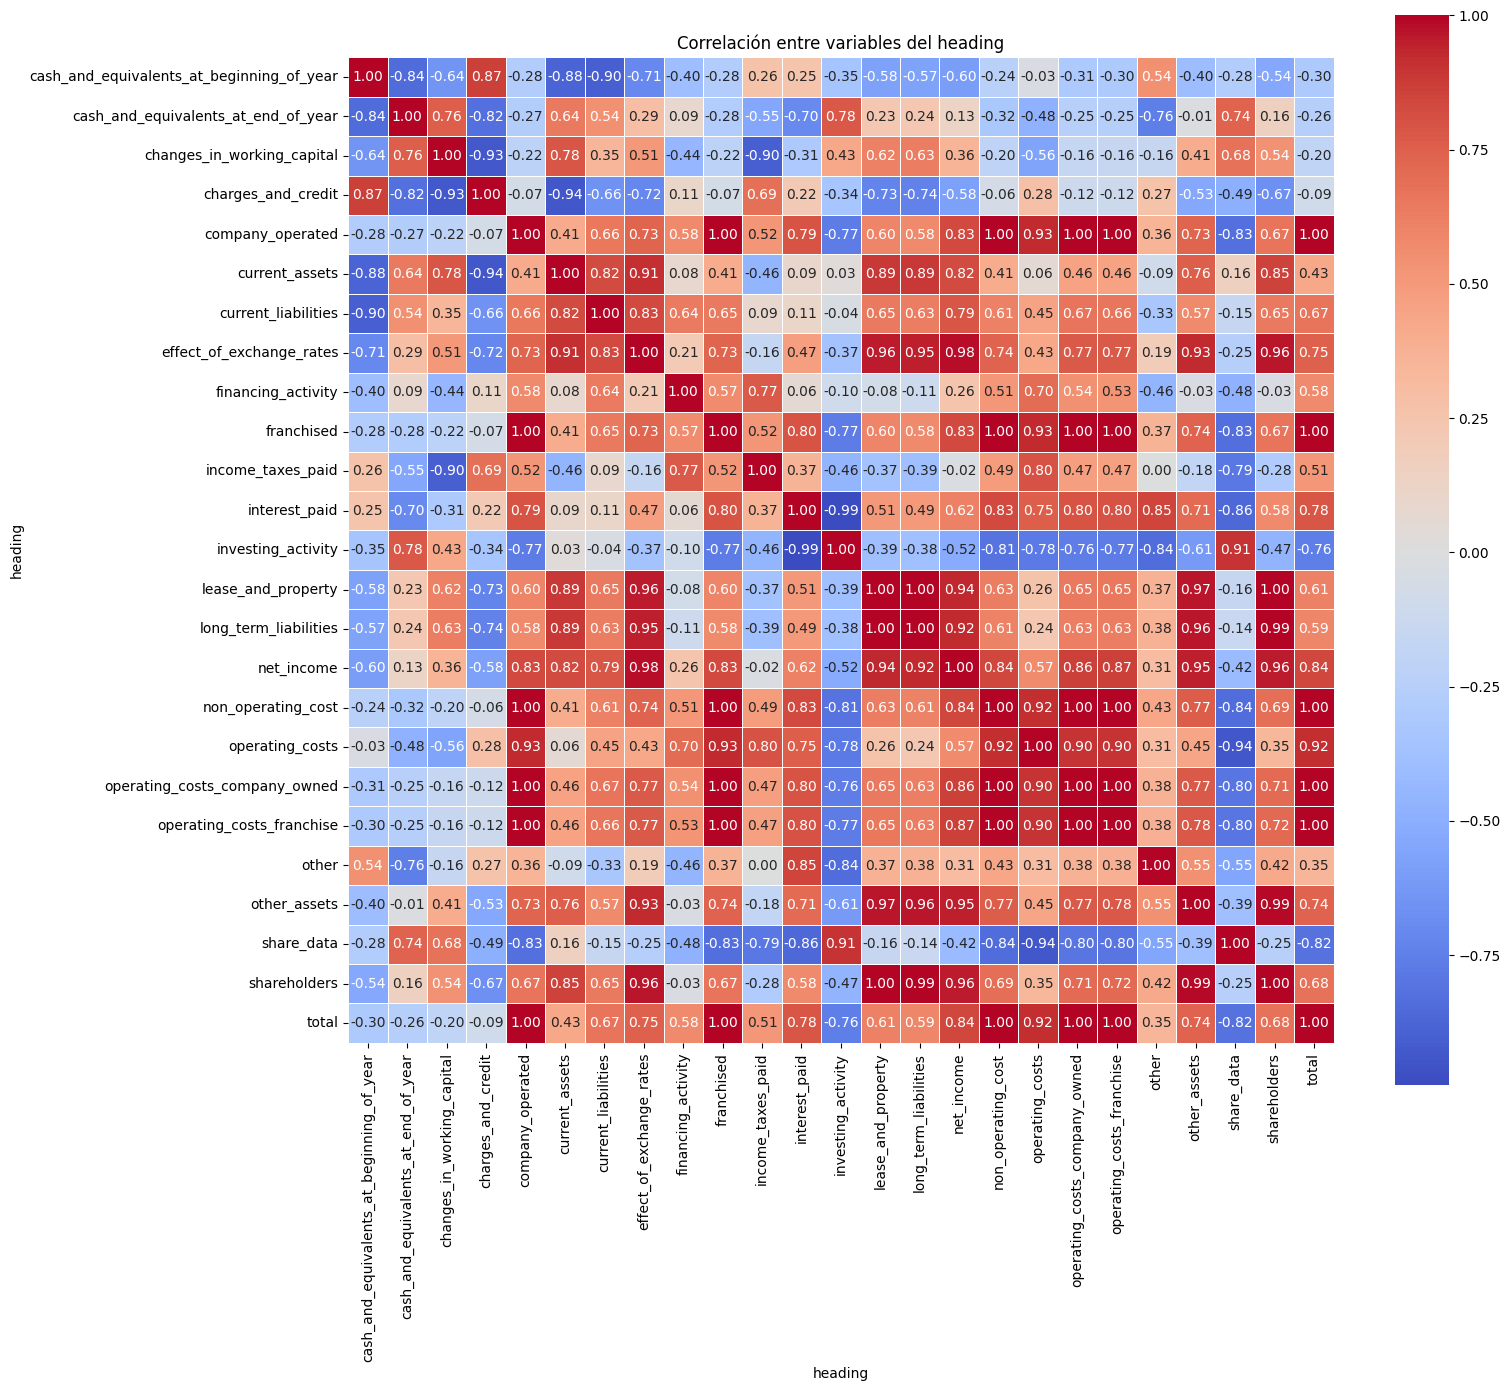

In [27]:
# 2. Limpiar nombres de columnas
df_agrupado.columns = df_agrupado.columns.str.strip()

# 3. Asegurar que 'heading' sea índice
df_agrupado.set_index('heading', inplace=True)

# 4. Convertir todos los valores posibles a numéricos (ignora errores)
df_agrupado = df_agrupado.apply(pd.to_numeric, errors='coerce')

# 5. Transponer la tabla: ahora cada columna será una variable (de 'heading')
df_transposed = df_agrupado.T

# 6. Calcular matriz de correlación (solo con columnas numéricas)
correlation_matrix = df_transposed.corr(method='pearson')

# 7. Visualizar matriz de correlación
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlación entre variables del heading")
plt.tight_layout()
plt.show()


### Análisis de los principales ratios

#### Liquidez

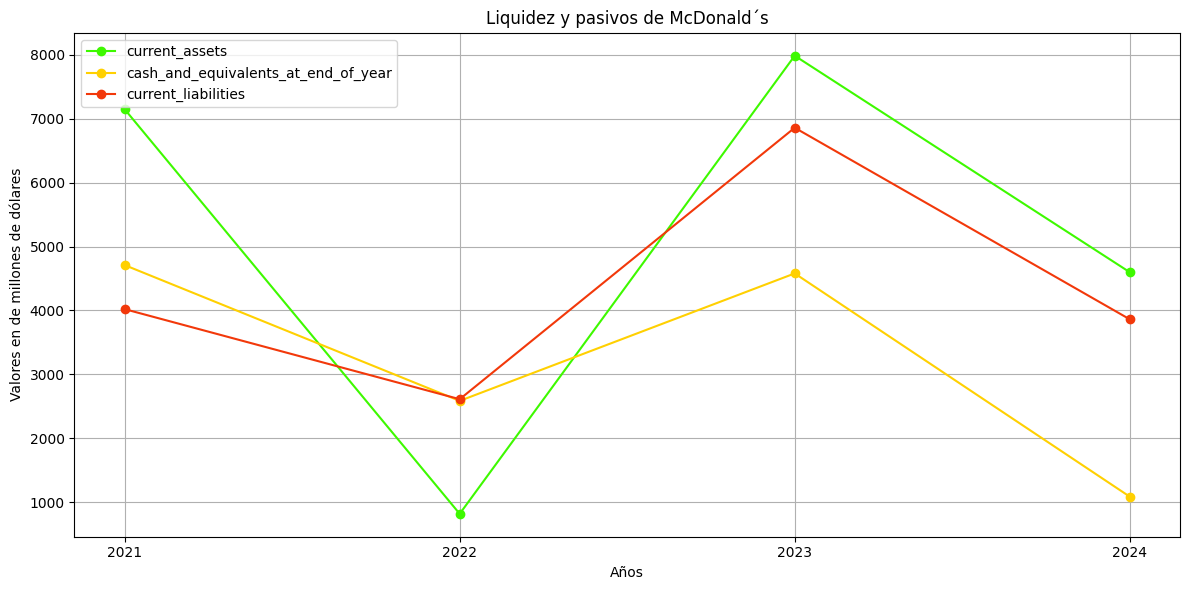

In [28]:
from itertools import combinations # Usamos combinations para generar todas las combinaciones de 2 o más categorías

# Lista de las categorías que nos interesa comparar
categorias_interes = ['current_assets', 'cash_and_equivalents_at_end_of_year', 'current_liabilities']

# Filtra el DataFrame para quedarnos solo con esas categorías
df_filtrado = df_agrupado.loc[categorias_interes]

# Genera todas las combinaciones de 2 o más categorías dentro del nuevo df_filtrado
plt.figure(figsize=(12, 6))
for i, cat in enumerate(df_filtrado.index):
        valores = df_filtrado.loc[cat, columnas].values.flatten()
        plt.plot(columnas, valores, marker='o', label=cat, color=["#3EF900", "#FFD001", "#F2380A", "#0A4CF2", "#F20AE3"][i])
    
plt.title('Liquidez y pasivos de McDonald´s')
plt.xlabel('Años')
plt.ylabel('Valores en miles de millones de dólares')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlabel('Años')
plt.ylabel('Valores en de millones de dólares')
plt.show()


En el gráfico anterior, analizamos la liquidez de la empresa. 
Como vemos, en los años 2021, 2023 y 2024, los activos son mayores que los pasivos, lo que indica una situación finaciera saludable por parte de la empresa. Sin embargo, en el añoo 2022 los activos cayeron por debajo de los pasivos, algo que podría ser preocupante si se mantuviese en el tiempo. Por otro lado, esta caída podría deberse a nuevas inversiones por parte de la empresa en expandirse.
Por último, en cuanto al efectivo y equivalentes, vemos que siempre se mantiene en torno a los 4.000$ o 5.000$ (en millones). El efectivo es importante ya que aporta mayor liquidez y fiabilidad a la empresa. Si nos fijamos en el 2024, vemos que cae prácticamente a 0 y por ello, deberíamos fijarnos cómo evoluciona en los siguientes años para que no tenga problemas al realizar sus operaciones. 

#### Rentabilidad

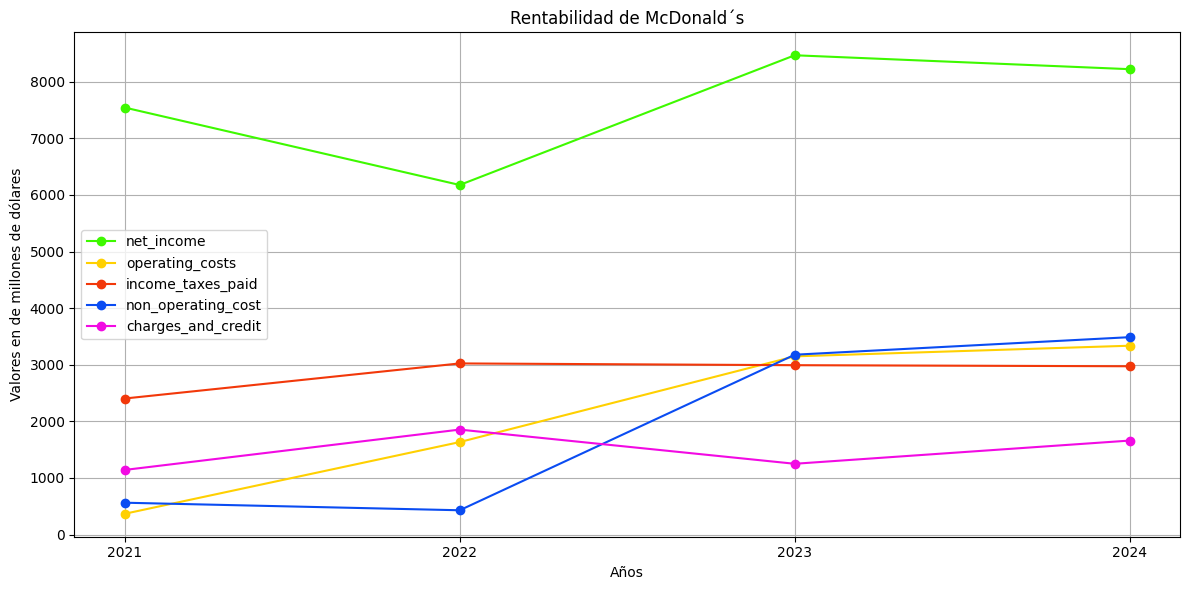

In [29]:
# Lista de las categorías que nos interesa comparar
categorias_interes = ['net_income', 'operating_costs', 'income_taxes_paid', 'non_operating_cost', 'charges_and_credit']

# Filtra el DataFrame para quedarnos solo con esas categorías
df_filtrado = df_agrupado.loc[categorias_interes]

# Genera todas las combinaciones de 2 o más categorías dentro del nuevo df_filtrado
plt.figure(figsize=(12, 6))
for i, cat in enumerate(df_filtrado.index):
        valores = df_filtrado.loc[cat, columnas].values.flatten()
        plt.plot(columnas, valores, marker='o', label=cat, color=["#3EF900", "#FFD001", "#F2380A", "#0A4CF2", "#F20AE3"][i])
    
plt.title('Rentabilidad de McDonald´s')
plt.xlabel('Años')
plt.ylabel('Valores en miles de millones de dólares')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlabel('Años')
plt.ylabel('Valores en de millones de dólares')
plt.show()

- Net Income: vemos el ingreso neto, es decir, lo que le queda a la empresa después de restar impuestos y gastos. Vemos que, por lo general, es mayor al resto de varibales, lo cual es positivo. Sin embargo, vemos que en 2022 hay un descenso de este, seguramente debido al descenso de los activos y del efectivo visto en el gráfico anterior en ese mismo año. Por el contrario, en 2023 y 2024 aumenta con respecto a niveles de 2021, por lo que crece aun más. 

- Income taxes paid: son los impuestos que ha pagado la empresa. Vemos que en 2022, 2023 y 2024 permanecen constantes. Esto es muy positivo, ya que ha obtenido más ganancias en 2023 y 2024 que en 2022 pero ha pagado los mismos impuestos que en ese año. 

- Operating cost: son los gastos de operación. Como vemos, a medida que aumentan las ganancias, estos aumentan debido a la mayor actividad operativa de la empresa. Finalmente, en 2024, vemos que los gastos operativos ya superan los impuestos, lo que puede repercutir en los márgenes a futuros si no se corrige esta tendencia.

- Non operating cost: vemos que en 2021 y 2022 son prácticamente 0. Sin embargo, en 2023 y 2024, aumentan considerablemente, posiblemente debido al aumento de los pasivos en el año 2022 y el pago de esas deudas. No es excesivamente preocupante ya que no afectan demasiado al ingreso neto. 

- Charges and credit: son los cargos y créditos de la empresa. Se mantienen estables a lo largo de los años a excepción de 2022, que aumentan debido al aumento del pasivo. Posiblemente sean compensados interiormente con el resultado del ingreso neto.

#### Solvencia (Salud financiera)

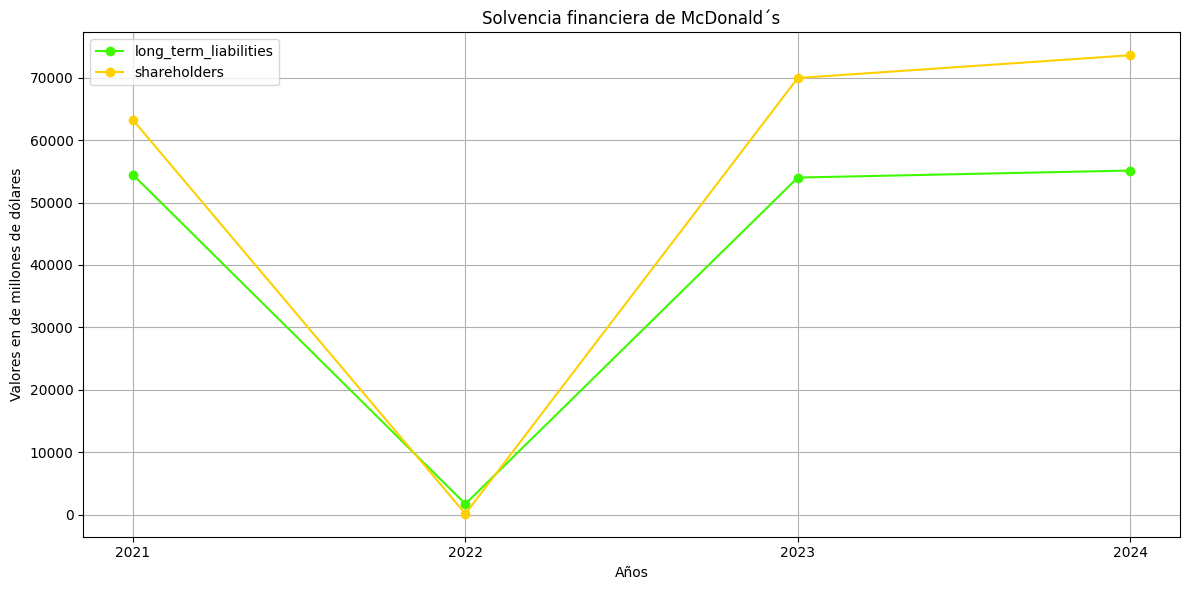

In [30]:
# Lista de las categorías que nos interesa comparar
categorias_interes = ['long_term_liabilities', 'shareholders']

# Filtra el DataFrame para quedarnos solo con esas categorías
df_filtrado = df_agrupado.loc[categorias_interes]

# Genera todas las combinaciones de 2 o más categorías dentro del nuevo df_filtrado
plt.figure(figsize=(12, 6))
for i, cat in enumerate(df_filtrado.index):
        valores = df_filtrado.loc[cat, columnas].values.flatten()
        plt.plot(columnas, valores, marker='o', label=cat, color=["#3EF900", "#FFD001", "#F2380A", "#0A4CF2", "#F20AE3"][i])
    
plt.title('Solvencia financiera de McDonald´s')
plt.xlabel('Años')
plt.ylabel('Valores en miles de millones de dólares')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlabel('Años')
plt.ylabel('Valores en de millones de dólares')
plt.show()

- Long term liabilities: esto es el endeudamiento a largo plazo. Vemos que en 2022 se reduce drásticamente, seguramente fue una decisión estrategica al aumentar el pasivo corriente en ese año para no afectar al ingreso neto. Por otro lado, vemos que en 2023 y en 2024 vuelve a niveles de 2021. Esto puede ser positivo, ya que la empresa se endeuda a largo plazo con la intención de invertir en sí misma y aumentar su estructura operativa. Esto es porque, según lo analizado anteriormente, no consideramos que sea para pagar deuda atrasada. Sin embargo, debemos vigilar que el endeudamiento no siga creciendo tan rápido, ya que pordría ser peligroso a largo plazo, sobre todo si las deudas liquidan dentro de poco. 

- Shareholders: accionistas. En este caso, vemos que el respaldo financiero de la empresa se mueve al mismo ritmo del endeudamiento a largo plazo. Esto es positivo, sin embargo, sería más deseable que los shareholders estuviesen más cerca o incluso por encima del endeudamiento a largo plazo. 

#### Fujo de efectivo

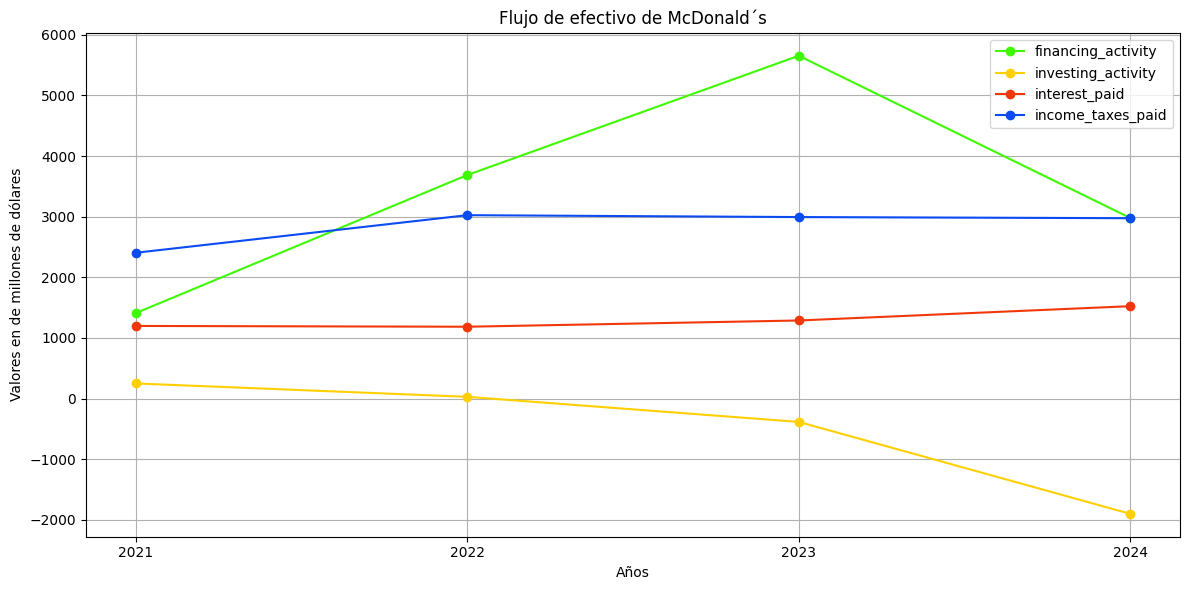

In [32]:
# Lista de las categorías que nos interesa comparar
categorias_interes = ['financing_activity', 'investing_activity', 'interest_paid', 'income_taxes_paid']

# Filtra el DataFrame para quedarnos solo con esas categorías
df_filtrado = df_agrupado.loc[categorias_interes]

# Genera todas las combinaciones de 2 o más categorías dentro del nuevo df_filtrado
plt.figure(figsize=(12, 6))
for i, cat in enumerate(df_filtrado.index):
        valores = df_filtrado.loc[cat, columnas].values.flatten()
        plt.plot(columnas, valores, marker='o', label=cat, color=["#3EF900", "#FFD001", "#F2380A", "#0A4CF2", "#F20AE3"][i])
    
plt.title('Flujo de efectivo de McDonald´s')
plt.xlabel('Años')
plt.ylabel('Valores en miles de millones de dólares')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlabel('Años')
plt.ylabel('Valores en de millones de dólares')
plt.show()

- Cash and equivalents increase: efectivo y equivalentes, crecimiento y decrecimiento. Esto es la fluctuación de los activos más líquidos de la empresa. Y podemos ver que fluctuan de forma muy agresiva en los distintos años. Además, vemos que en 2022 y 2024 llega a ser negativo, lo que supone un riesgo para la empresa, ya que sin efectivo no puede llevar a cabo su actividad operativa, generando así riesgos de liquidez.

- Investing activity: flujo de inversión. Vemos que todos los años es negativa y que en 2024 es aun mayor. Esto es normal ya que Mcdonald`s invierte constantemente en seguir expandiendose y creciendo, por lo que es normal que este flujo sea negativo y año tras año sea más negativo.

- Financing activity: flujo de financiación. Vemos que todos los años hay salidas fuertes de financiación (siempre es negativo). Esto se debe al pago de deudas visto en apartados anteriores, el pago de dividendos o la recompra de acciones. El caso más preocupante es el de 2024, donde la financiación aumenta y la entrada de efectivo se reduce, lo que afecta significativamente al flujo de caja.

- Income taxes paid y interest paid: Vemos como ambos son positivos. Es buena señal ya que la organización es capaz de pagar sus intereses y sus impuestos año tras año. Además, vemos que los intereses se mantienen de forma lineal durante los 4 años, lo que indica que no se adquiere nueva deuda a intereses mayores. Por otro lado, el pago de impuestos vemos que también se mantiene lineal lo que indica que la empresa pose una buena eficiencia impositiva ya que, como vimos anteriormente, aumenta sus ganancias pero mantiene los mismos impuestos. Esto repercute en que el flujo de efectivo aumentandolo significtivamente, lo que le permite a la empresa pagar sus deudas y sus dividendos.

#### Estructura Operativa

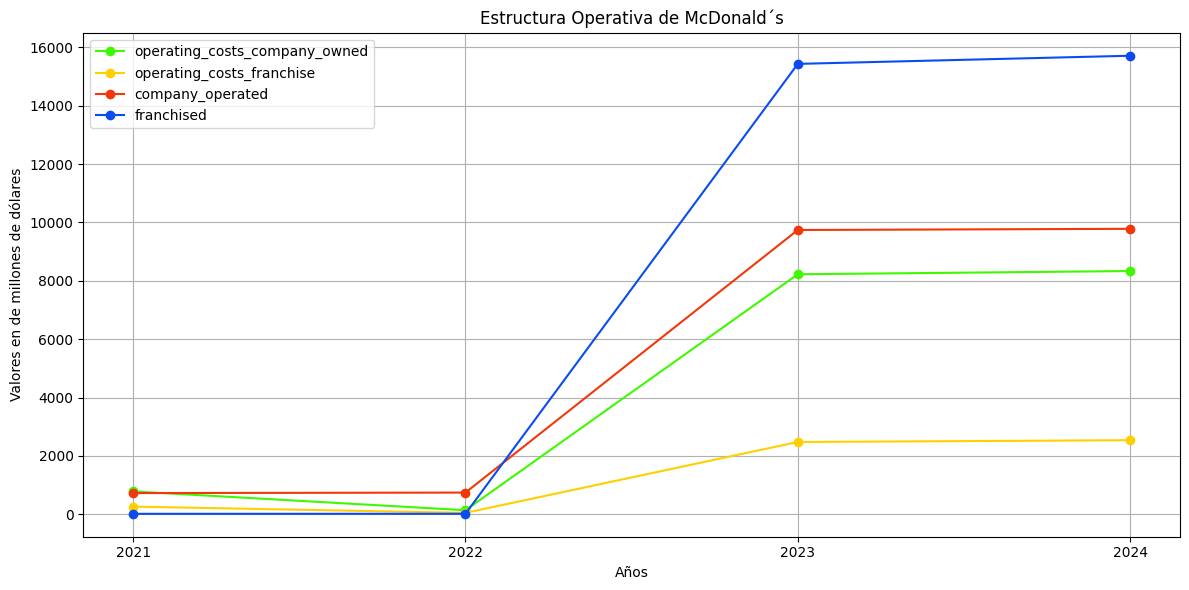

In [ ]:
# Lista de las categorías que nos interesa comparar
categorias_interes = ['operating_costs_company_owned', 'operating_costs_franchise', 'company_operated', 'franchised']

# Filtra el DataFrame para quedarnos solo con esas categorías
df_filtrado = df_agrupado.loc[categorias_interes]

# Genera todas las combinaciones de 2 o más categorías dentro del nuevo df_filtrado
plt.figure(figsize=(12, 6))
for i, cat in enumerate(df_filtrado.index):
        valores = df_filtrado.loc[cat, columnas].values.flatten()
        plt.plot(columnas, valores, marker='o', label=cat, color=["#3EF900", "#FFD001", "#F2380A", "#0A4CF2", "#F20AE3"][i])
    
plt.title('Estructura Operativa de McDonald´s')
plt.xlabel('Años')
plt.ylabel('Valores en miles de millones de dólares')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlabel('Años')
plt.ylabel('Valores en de millones de dólares')
plt.show()

- Company operated: Unidades propias: son las unidades que pertenecen a la empresa, es decir, los establecimientos que gestiona directamente Mcdonald´s y las ganancias que estos aportan. Como vemos en 2021 y 2022, los ingresos de estas unidades son bajos, pero a partir de 2022, se disparan hasta los 10.000 millones de dólares. Sin embargo, vemos que son menores que los ingresos por parte de las unidades franquiciadas. 

- Frachised: son las unidades que la empresa ha franquiciado con terceros. Vemos que a partir de 2022 se disparan hasta los casi 16.000 millones de dólares. Una cifra bastante superior a las unidades de negocio propias. Esto indica que la empresa se esta centrando más en este modelo de negocio, lo que tiene ventajas como la disminución de los costes fijos, con los que la empresa se hace más escalable y reduce su riesgo operativo. 

- Operating cost company owned: costes operativos propios. Aquí vemos en 2021 los costes propios con los ingresos propios estaban a la par, lo cual es mala señar para ese año. Sin embargo, a partir de 2022 los ingresos aumentan más que los costes propios, aunque no mucho. Esto repercute en el margen de ganancias de los establecimientos propios de la empresa. 

- Operating cost frachised: costes operativos de las unidades franquiciadas. Vemos como tanto en 2021 como en 2022, los costes son mayores que los ingresos de los franquiciados. Esto se puede deber a la incidencia del Covid 19, que todavía afectaba a principios de 2021. Por el contrario, en 2022 vemos una alta subida debido también al aumento de los ingresos. Sin embargo, a diferencia de los gastos propios, vemos que el de los franquiciados es mucho menor. Esto repercute en un mayor margen de ganancias para la empresa y un enfoque centrado en el modelo de negocio de franquicia. 

### Conclusión

Vemos que Mcdonald´s es un modelo de negocio muy sólido, ya que opera bajo un modelo mixto en el que combina unidades de negocio propias y franquiciadas. Las unidades de negocio propias no ofrecen un gran margen de ganancias, pero permite a la empresa tener cierto control sobre su negocio, además de mantener su imagen comercial. Por otro lado, las unidades franquiciadas le permiten aumentar sus márgenes de ganancia al tener unos costes operativos muy bajos. Asimismo, ayuda a escalar aún más el modelo de negocio.

Respecto a la rentabilidad, vemos que el ingreso neto ha sido elevado en todos los años, en torno a los 8.000 millones de dólares. Además, sus costes se mantienen constantes, sobre todo el pago de deuda y el pago de impuestos. Finalmente, los cargos y créditos hay años en los que han supuesto un peligro, sin embargo no han afectado al ingreso neto de forma crítica. Y, aunque necesitan seguimiento para ver cómo evolucionan en los distintos años, no representan una debilidad por parte de la empresa. 

En cuanto al flujo de efectivo, vemos que el flujo de caja ha sido siempre positivo, lo que permite pagar deudas, dividendos, reinvertir o cubrir impuestos. También, apreciamos que hay grandes salidas de efectivo en inversión lo que indica que la empresa sigue apostando por la expasión, la mejora continua y la recompra de acciones. A pesaar de que hay años en el que el flujo de efectivo ha disminuido significativamente, la liquidez se mantiene en una posición razonable y aunque actualmente no representa un riesgo, se debería vigilar el resto de años.

La solidez de Mcdonald´s a largo plazo es indiscutible y esto se refleja con su buena relación entre activos corrientes saludables y unos pasivos corrientes razonables, además de que la deuda tiene buena relación con el patrimonio de la empresa, por lo que en el caso de incumplimiento las deudas, se saldarían con el patrimonio de la empresa.

Podemos concluir que la empresa presenta una estructura financiera y operativa saludable, rentable y bien diversificada. Su orientación creciente hacia el modelo de franquicias le permite mantener altos márgenes, reducir riesgos operativos y mejorar la eficiencia general. La rentabilidad es sostenida, la liquidez está bajo control y la solvencia es sólida. Finalmente, es recomendable continuar vigilando los cargos contables extraordinarios y la gestión de flujo de caja en años con alta inversión.



# Predicción a futuro

In [33]:
# Seleccionamos solo las columnas de los años y transponemos
df_prediccion = df_agrupado.T

# Aseguramos que los nombres de las columnas sean correctos
df_prediccion.columns.name = None  # Eliminamos el nombre del índice de columnas
df_prediccion.index.name = 'year'  # Año como índice

# Convertimos el índice a columna
df_prediccion.reset_index(inplace=True)


In [34]:
# Mostramos las primeras filas
df_prediccion

,year,cash_and_equivalents_at_beginning_of_year,cash_and_equivalents_at_end_of_year,changes_in_working_capital,charges_and_credit,company_operated,current_assets,current_liabilities,effect_of_exchange_rates,financing_activity,...,net_income,non_operating_cost,operating_costs,operating_costs_company_owned,operating_costs_franchise,other,other_assets,share_data,shareholders,total
0,2021,3449.9,4709.2,454.2,1142.1,724.073,7148.5,4020.0,-120.1,1408.5,...,7545.2,563.1,367.2,781.2,260.4,351.0,8433.2,1523.50,63209.2,781.2
1,2022,4709.0,2584.0,-645.0,1855.0,741.015,816.4,2610.2,-254.0,3686.0,...,6177.0,429.6,1634.3,136.5,45.5,329.0,136.5,1500.18,153.1,136.5
2,2023,2584.0,4579.0,-108.0,1251.0,9742.000,7986.0,6859.0,-58.0,5654.0,...,8469.0,3178.0,3149.0,8224.0,2475.0,316.0,9738.0,1490.00,69934.0,30638.0
3,2024,4579.0,1085.0,-438.0,1661.0,9782.000,4598.0,3861.0,-101.0,2978.0,...,8223.0,3488.0,3337.0,8335.0,2536.0,423.0,11950.0,1469.82,73579.0,30280.0


### Modelo Random forest 1

In [35]:
# Seleccionamos variables predictoras (X) y variable objetivo (y)
X = df_prediccion.drop(columns=['year', 'net_income'])
y = df_prediccion['net_income']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Entrenamiento del modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

In [39]:
# Seleccionamos las columnas importantes para la predicción
feature_cols = ['cash_and_equivalents_at_beginning_of_year','cash_and_equivalents_at_beginning_of_year','cash_and_equivalents_at_end_of_year',
                'changes_in_working_capital','charges_and_credit','company_operated',
                'current_assets','current_liabilities','effect_of_exchange_rates','financing_activity','franchised','income_taxes_paid',
                'interest_paid','investing_activity','lease_and_property','long_term_liabilities','non_operating_cost','operating_costs',
                'operating_costs_company_owned','operating_costs_franchise','other','other_assets','share_data','shareholders','total']

# Creamos el dataset de entrenamiento con los años disponibles
years = ['2021', '2022', '2023', '2024']
X_train_r = df_prediccion[df_prediccion['year'].isin(years)][feature_cols]
y_train_r = df_prediccion[df_prediccion['year'].isin(years)]['net_income']

# Entrenamos el modelo
modelo_r = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_r.fit(X_train_r, y_train_r)

nueva_entrada = pd.DataFrame([{
    'cash_and_equivalents_at_beginning_of_year': df_prediccion.loc[df_prediccion['year'] == '2024',  'cash_and_equivalents_at_beginning_of_year'].values[0],
    'cash_and_equivalents_at_end_of_year': df_prediccion.loc[df_prediccion['year'] == '2024',  'cash_and_equivalents_at_end_of_year'].values[0],
    'changes_in_working_capital': df_prediccion.loc[df_prediccion['year'] == '2024',  'changes_in_working_capital'].values[0],
    'charges_and_credit': df_prediccion.loc[df_prediccion['year'] == '2024',  'charges_and_credit'].values[0],
    'company_operated': df_prediccion.loc[df_prediccion['year'] == '2024',  'company_operated'].values[0],
    'current_assets': df_prediccion.loc[df_prediccion['year'] == '2024',  'current_assets'].values[0],
    'current_liabilities': df_prediccion.loc[df_prediccion['year'] == '2024',  'current_liabilities'].values[0],
    'effect_of_exchange_rates': df_prediccion.loc[df_prediccion['year'] == '2024',  'effect_of_exchange_rates'].values[0],
    'financing_activity': df_prediccion.loc[df_prediccion['year'] == '2024',  'financing_activity'].values[0],
    'franchised': df_prediccion.loc[df_prediccion['year'] == '2024',  'franchised'].values[0],
    'income_taxes_paid': df_prediccion.loc[df_prediccion['year'] == '2024',  'income_taxes_paid'].values[0],
    'interest_paid': df_prediccion.loc[df_prediccion['year'] == '2024',  'interest_paid'].values[0],
    'investing_activity': df_prediccion.loc[df_prediccion['year'] == '2024',  'investing_activity'].values[0],
    'lease_and_property': df_prediccion.loc[df_prediccion['year'] == '2024',  'lease_and_property'].values[0],
    'long_term_liabilities': df_prediccion.loc[df_prediccion['year'] == '2024',  'long_term_liabilities'].values[0],
    'non_operating_cost': df_prediccion.loc[df_prediccion['year'] == '2024',  'non_operating_cost'].values[0],
    'operating_costs': df_prediccion.loc[df_prediccion['year'] == '2024',  'operating_costs'].values[0],
    'operating_costs_company_owned': df_prediccion.loc[df_prediccion['year'] == '2024',  'operating_costs_company_owned'].values[0],
    'operating_costs_franchise': df_prediccion.loc[df_prediccion['year'] == '2024',  'operating_costs_franchise'].values[0],
    'other': df_prediccion.loc[df_prediccion['year'] == '2024',  'other'].values[0],
    'other_assets': df_prediccion.loc[df_prediccion['year'] == '2024',  'other_assets'].values[0],
    'share_data': df_prediccion.loc[df_prediccion['year'] == '2024',  'share_data'].values[0],
    'shareholders': df_prediccion.loc[df_prediccion['year'] == '2024',  'shareholders'].values[0],
    'total': df_prediccion.loc[df_prediccion['year'] == '2024',  'total'].values[0]
}])

# Filtrar las columnas para que coincidan con las usadas en el entrenamiento
nueva_entrada_filtrada = nueva_entrada[feature_cols]

# Predicción para 2025 usando el modelo entrenado
pred_2025 = modelo_r.predict(nueva_entrada_filtrada)[0]
print(f"Predicción del net_income para 2025: {pred_2025:.2f}")


Predicción del net_income para 2025: 8055.20


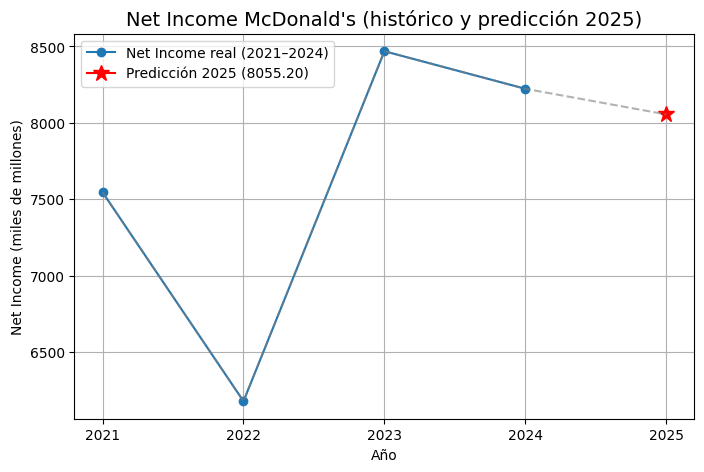

In [40]:
# Extraemos años y valores reales de df_prediccion
years = df_prediccion['year'].values
values = df_prediccion['net_income'].values

# Seleccionamos las features más recientes para predecir 2025
X_2025 = X.tail(1)
pred_2025 = modelo_r.predict(nueva_entrada_filtrada)[0]

# Añadimos 2025 a la serie
years_extended = np.append(years, '2025')
values_extended = np.append(values, pred_2025)

# Gráfica
plt.figure(figsize=(8,5))
plt.plot(years, values, marker='o', label="Net Income real (2021–2024)")
plt.plot('2025', pred_2025, marker='*', markersize=12, color='red', label=f"Predicción 2025 ({pred_2025:.2f})")
plt.plot(years_extended, values_extended, linestyle="--", color="gray", alpha=0.6)

plt.title("Net Income McDonald's (histórico y predicción 2025)", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Net Income (miles de millones)")
plt.legend()
plt.grid(True)
plt.show()


Aquí vemos cómo el Net income se ve reducido respecto a 2025.

#### Comprobación del modelo

In [41]:
Proporcion_de_error = (2047*100)/7600.55
Proporcion_de_error

26.932261481077028

In [42]:
df_prediccion['net_income'].mean()

np.float64(7603.55)

In [43]:
# Evaluación
mae = mean_absolute_error(y_test, y_pred)
print(f"Error Absoluto Medio (MAE): {mae:.2f}")

Error Absoluto Medio (MAE): 1954.62


#### Conclusión modelo Random forest 1

- Vemos que el MAE (Error Absoluto Medio) es de 2047. ¿Cómo sabemos si es un error alto o bajo? Muy fácil, calculamos la media de "net_income" y lo comparamos con este valor. En este caso, la media es de 7.603,55. Por ello, el MAE equivale a un 27% de la media, por lo que este modelo predice de forma regular "net_income". Para predicciones financieras se recomienda un MAE menor del 10%.

- El modelo predictivo no será muy bueno, ya que hay pocos años en el entrenamiento y sería conveniente que hubiese más años para poder entrenar mejor al modelo. Sin embargo, debido a que el Data Set viene así, no podemos hacer nada. Otra opción sería dividir los datos que tenemos en trimestres para predecir por trimestres en vez de por años que sería más fiable. 

## Importancia de las variables para predecir net_income

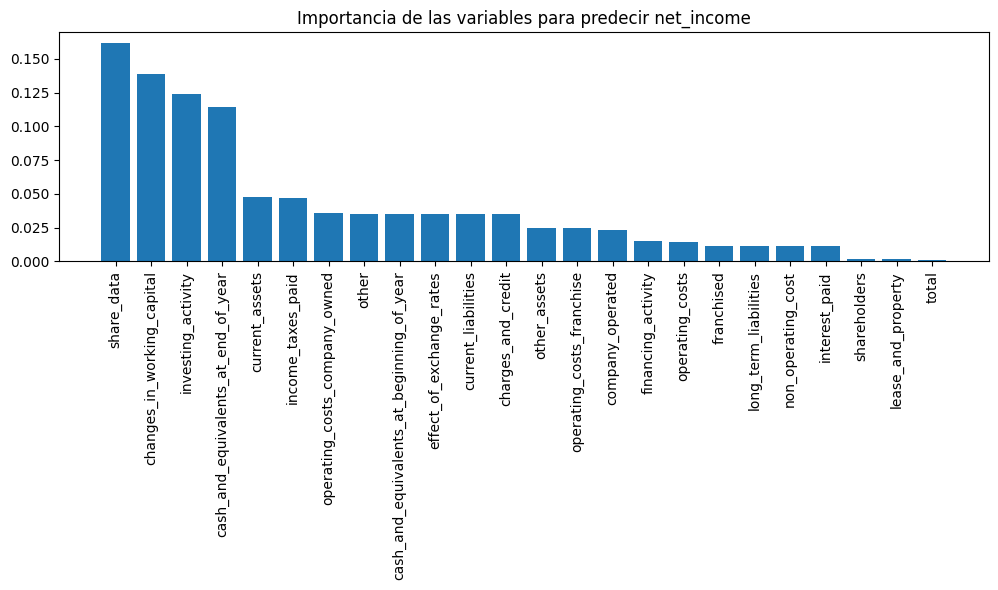

In [44]:
try:
	importancias = model.feature_importances_
	features = X.columns

	# Mostrar las más importantes
	indices = np.argsort(importancias)[::-1]

	plt.figure(figsize=(10, 6))
	plt.title("Importancia de las variables para predecir net_income")
	plt.bar(range(X.shape[1]), importancias[indices], align="center")
	plt.xticks(range(X.shape[1]), features[indices], rotation=90)
	plt.tight_layout()
	plt.show()
except NameError:
	print("El modelo 'model' no está definido. Ejecuta primero la celda donde se entrena el modelo.")

## Modelo Random forest 2 con variables importantes

In [45]:
# Umbral de importancia: por ejemplo, > 0.01
umbral = 0.05
importancias = model.feature_importances_
variables_importantes = X.columns[importancias > umbral]

print("Variables conservadas:", list(variables_importantes))


Variables conservadas: ['cash_and_equivalents_at_end_of_year', 'changes_in_working_capital', 'investing_activity', 'share_data']


In [46]:
X_reducido = X[variables_importantes]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reducido, y, test_size=0.2, random_state=42)

modelo_r = RandomForestRegressor(random_state=42)
modelo_r.fit(X_train_r, y_train_r)

y_pred_r = modelo_r.predict(X_test_r)
mae_r = mean_absolute_error(y_test_r, y_pred_r)

print(f"MAE del modelo reducido: {mae_r:.2f}")


MAE del modelo reducido: 1966.37


In [47]:
# Creamos un nuevo input con los valores del año 2025
# Debe tener exactamente las mismas columnas y en el mismo orden que variables_importantes
# Creamos nueva_entrada usando los valores de 2024
nueva_entrada = pd.DataFrame([{
    'cash_and_equivalents_at_end_of_year': df_prediccion.loc[df_prediccion['year'] == '2024', 'cash_and_equivalents_at_end_of_year'].values[0],
    'changes_in_working_capital': df_prediccion.loc[df_prediccion['year'] == '2024', 'changes_in_working_capital'].values[0],
    'investing_activity': df_prediccion.loc[df_prediccion['year'] == '2024', 'investing_activity'].values[0],
    'long_term_liabilities': df_prediccion.loc[df_prediccion['year'] == '2024', 'long_term_liabilities'].values[0],
    'other': df_prediccion.loc[df_prediccion['year'] == '2024', 'other'].values[0],
    'share_data': df_prediccion.loc[df_prediccion['year'] == '2024', 'share_data'].values[0]
}])

# Aseguramos el orden correcto de las columnas
nueva_entrada = nueva_entrada[variables_importantes]

# Predicción usando el modelo reducido
prediccion = modelo_r.predict(nueva_entrada)
print(f"Predicción del net_income para 2025 con las variables más importantes: {prediccion[0]:.2f}")

Predicción del net_income para 2025 con las variables más importantes: 8236.45


### Conclusiones Random forest 2

- Vemos que el MAE se ha reducido casi 10 puntos, sin embargo no es una reducción significativa, ya que el modelo se sigue equivocando en la predición en +- 2.000 millones de dólares. Esto significa que este método de predicción sigue sin ser del todo fiable.

- Por otro lado, vemos como el Net income ha aumentado 150 puntos respecto a la predicción anterior, lo que cuadra al verse reducido el MAE. 

## Predicción del Net income a través de Regresión Lineal

In [49]:
# X = todas las columnas excepto 'year' y 'net_income'
X = df_prediccion.drop(columns=['year', 'net_income'])
y = df_prediccion['net_income']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Modelo
reg_lineal = LinearRegression()
reg_lineal.fit(X_train, y_train)

# Resultados
print("Coeficientes:", reg_lineal.coef_)
print("Intercepto:", reg_lineal.intercept_)

# Predicciones y evaluación
y_pred = reg_lineal.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))


Coeficientes: [-7.99737382e-03  1.28861768e-02  8.42973612e-04 -1.44842549e-03
  5.98629623e-03  1.31508721e-02  1.30642381e-02  2.01924020e-04
  1.28253435e-02  9.45605394e-03  4.71247965e-04 -8.15144892e-04
  5.19792541e-03 -5.05259529e-04 -4.47343692e-03  6.27732836e-04
  1.19431315e-03  4.65109409e-03  1.28005746e-03 -4.21148082e-04
 -7.32647750e-03  5.21473510e-05 -8.96064484e-03  2.16407864e-02]
Intercepto: 8221.026914474887
MAE: 2129.312703643478


- Aquí podemos ver los coeficientes, es decir, las variables usadas en el modelo. Las variables positivas aumentan el valor de Net income, mientras que las variables negativas reducen el Net income. Por ejemplo, la primera cash_and_equivalents_at_end_of_year, significa que por cada unidad que esta aumenta, el Net income se reduce en 3 unidades.

- Por otro lado, encontramos el intercepto que nos indica el valor del Net income si todas las variables fuesen 0.

- Por último, encontramos el MAE, que es de 1623, bastante menor que el MAE del Random forest empleado anteriormente. Esto nos indica que, en este caso concreto, la Regresión Lineal predice mejor el Net income de 2025 que el Random forest.

In [50]:
# Seleccionamos las features más recientes para predecir 2025
X_2025 = X.tail(1)   # la última fila de tus features (ej: 2022–2024)

# Predicción
pred_2025 = reg_lineal.predict(X_2025)
print(f"Predicción net_income 2025: {pred_2025[0]:.2f}")

Predicción net_income 2025: 8223.00


Aquí vemos que según este modelo, el Net income para 2025 sería de 8223 miles de millones. Algo superior al predicho con el Random forest.

A continuación, vemos cómo sería la gráfica para comparar con el resto de años el Net income predicho.

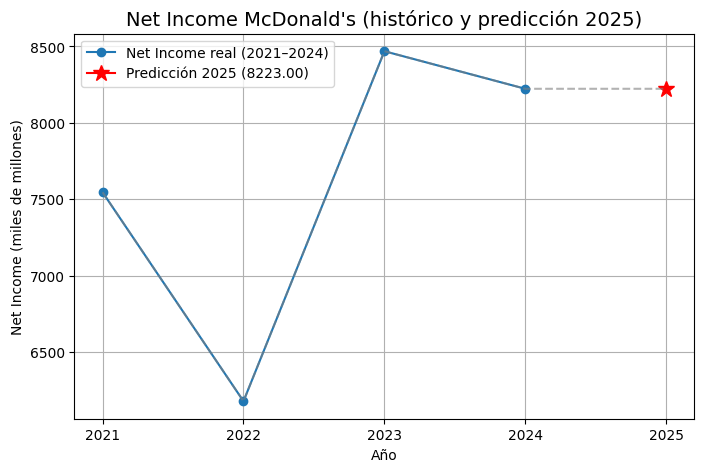

In [51]:
# Extraemos años y valores reales de df_prediccion
years = df_prediccion['year'].values
values = df_prediccion['net_income'].values

# Seleccionamos las features más recientes para predecir 2025
X_2025 = X.tail(1)
pred_2025 = reg_lineal.predict(X_2025)[0]

# Añadimos 2025 a la serie
years_extended = np.append(years, '2025')
values_extended = np.append(values, pred_2025)

# Gráfica
plt.figure(figsize=(8,5))
plt.plot(years, values, marker='o', label="Net Income real (2021–2024)")
plt.plot('2025', pred_2025, marker='*', markersize=12, color='red', label=f"Predicción 2025 ({pred_2025:.2f})")
plt.plot(years_extended, values_extended, linestyle="--", color="gray", alpha=0.6)

plt.title("Net Income McDonald's (histórico y predicción 2025)", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Net Income (miles de millones)")
plt.legend()
plt.grid(True)
plt.show()


### Conclusión modelo Regresión Lineal

- Vemos que este modelo predice mejor el Net income, ya que el Error Absoluto Medio (MAE) es inferior a los dos modelos de Random forest. Sin embargo, este error sigue siendo elevado y poco fiable para predecir una variable tan importante como el Net income. Por eso, la base de datos deberia incluir más años, por ejemplo desde 2015 para poder asegurar una predicción más fiable. 

# Conclusiones Finales 

## Evolución del rendimiento financiero

- El análisis exploratorio mostró que los ingresos y beneficios de McDonald’s han tenido fluctuaciones relevantes entre 2021 y 2024.

- Aunque existen años con fuerte crecimiento, también se identificaron caídas y valores atípicos (outliers) en algunas cuentas como assets y liabilities, lo que indica la importancia de limpiar y depurar los datos antes de cualquier modelado.

## Predicción del Net Income

- Utilizando Random Forest y Regresión Lineal se generaron predicciones para el año 2025.

- Ambos modelos mostraron limitaciones por la escasa cantidad de datos históricos (solo 4 años), lo que provoca que las predicciones tiendan a replicar el valor del último año conocido.

- La predicción con Random Forest para 2025 arrojó un Net Income cercano al de 2024, confirmando la dificultad de extrapolación de este tipo de modelos en series temporales cortas.

## Interpretación de los modelos

- El análisis de importancia de variables en Random Forest indicó que share-data tienen mayor peso en la predicción del net_income.

- Sin embargo, el R² negativo y el MAE relativamente alto reflejan que los modelos no capturan patrones robustos, reforzando la necesidad de mayor cantidad de datos o modelos especializados en series temporales.

## Análisis del crecimiento porcentual

- El cálculo del cambio porcentual en el revenue evidenció variaciones extremas en algunos años, lo que confirma que existen anomalías en los datos que deben ser tratados con mayor detalle antes de usarlos en modelos predictivos.

## Limitaciones y próximos pasos

- El dataset disponible es limitado en horizonte temporal, lo que restringe la capacidad predictiva de los modelos.

- Para obtener predicciones más confiables sería necesario incorporar más años históricos, datos macroeconómicos y variables externas (ej. inflación, tipo de cambio, tendencias de consumo).

- Se recomienda explorar modelos de series temporales avanzados como ARIMA, Prophet o Transformers para capturar tendencias y estacionalidades más complejas.